In [3]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import accuracy_score

TRAIN_DATA_PATH = 'AG_G_dataset-PTC_training.csv'
TEST_DATA_PATH = 'AG_G_dataset-PTC_test.csv'
TARGET_NAME = 'Diameter of Bulb(mm)'

# Load the data
train_data = pd.read_csv(TRAIN_DATA_PATH)
test_data = pd.read_csv(TEST_DATA_PATH)

x_train, y_train = train_data.drop(TARGET_NAME, axis=1), train_data[TARGET_NAME]
x_test, y_test = test_data.drop(TARGET_NAME, axis=1), test_data[TARGET_NAME]

# Normalize the target variable
scaler = StandardScaler()
y_train_scaled = scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler.transform(y_test.values.reshape(-1, 1))

def scale_datasets(x_train, x_test):
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train), columns=x_train.columns)
    x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_test.columns)
    return x_train_scaled, x_test_scaled

x_train_scaled, x_test_scaled = scale_datasets(x_train, x_test)

hidden_units1 = 160
hidden_units2 = 480
hidden_units3 = 256
learning_rate = 0.1

# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
    model = Sequential([
        Dense(hidden_units1, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units2, kernel_initializer='normal', activation='relu'),
        Dropout(0.2),
        Dense(hidden_units3, kernel_initializer='normal', activation='relu'),
        Dense(1, kernel_initializer='normal', activation='linear')
    ])
    return model

# build the model
model = build_model_using_sequential()

# loss function
msle = MeanSquaredError()
model.compile(loss=msle, optimizer=Adam(learning_rate=learning_rate), metrics=[msle])

# train the model
history = model.fit(x_train_scaled.values,y_train_scaled,epochs=100, batch_size=32,validation_split=0.2)

Epoch 1/100
2/2 [==============================] - 1s 130ms/step - loss: 164670.6406 - mean_squared_error: 183671.0156 - val_loss: 812.7531 - val_mean_squared_error: 812.7531
Epoch 2/100
2/2 [==============================] - 0s 32ms/step - loss: 165254.9844 - mean_squared_error: 184021.0156 - val_loss: 7982.3999 - val_mean_squared_error: 7982.3999
Epoch 3/100
2/2 [==============================] - 0s 33ms/step - loss: 44167.6289 - mean_squared_error: 49005.7188 - val_loss: 219708.1875 - val_mean_squared_error: 219708.1875
Epoch 4/100
2/2 [==============================] - 0s 33ms/step - loss: 14514.1465 - mean_squared_error: 13771.5840 - val_loss: 3247.1174 - val_mean_squared_error: 3247.1174
Epoch 5/100
2/2 [==============================] - 0s 34ms/step - loss: 2317.2876 - mean_squared_error: 2126.5112 - val_loss: 8007.6177 - val_mean_squared_error: 8007.6177
Epoch 6/100
2/2 [==============================] - 0s 29ms/step - loss: 438.3831 - mean_squared_error: 440.3123 - val_loss: 1

Epoch 51/100
2/2 [==============================] - 0s 28ms/step - loss: 0.6710 - mean_squared_error: 0.6982 - val_loss: 2.0017 - val_mean_squared_error: 2.0017
Epoch 52/100
2/2 [==============================] - 0s 28ms/step - loss: 0.7618 - mean_squared_error: 0.7165 - val_loss: 1.8637 - val_mean_squared_error: 1.8637
Epoch 53/100
2/2 [==============================] - 0s 28ms/step - loss: 0.2919 - mean_squared_error: 0.2843 - val_loss: 1.7213 - val_mean_squared_error: 1.7213
Epoch 54/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2699 - mean_squared_error: 0.2745 - val_loss: 1.6625 - val_mean_squared_error: 1.6625
Epoch 55/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5670 - mean_squared_error: 0.5729 - val_loss: 1.6577 - val_mean_squared_error: 1.6577
Epoch 56/100
2/2 [==============================] - 0s 27ms/step - loss: 0.3534 - mean_squared_error: 0.3485 - val_loss: 1.6492 - val_mean_squared_error: 1.6492
Epoch 57/100
2/2 [================

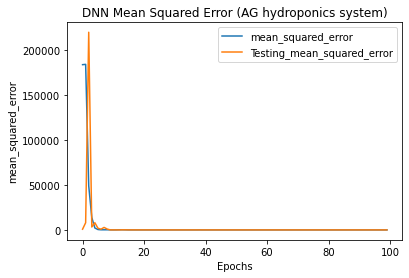

In [5]:
def plot_history(history, key):
    plt.plot(history.history[key])
    plt.plot(history.history['val_' + key])
    plt.title('DNN Mean Squared Error (AG hydroponics system)')
    plt.xlabel("Epochs")
    plt.ylabel(key)
    plt.legend([key, 'Testing_' + key])
    plt.show()

# Plot the history
plot_history(history, 'mean_squared_error')